In [1]:
import numpy as np 
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import gdown
import glob

In [ ]:
file_path = "test.zip"
output = file_path

gdown.download("https://drive.google.com/uc?id=1JPgasvr1db3boCrnuSDRzXCXbbhptQ0h", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1o1aX8fPCUFL8r6B-jsQtsbIUyuLc8Cge", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1agaBydG4SR_HiUisGQBv7k8PkmUTHW61", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

In [9]:
""""
db_path = "Face Emotions Images/"
angry = [cv2.imread(file) for file in glob.glob(db_path+"angry/*.*")]
disgust = [cv2.imread(file) for file in glob.glob(db_path+"disgust/*.*")]
fear = [cv2.imread(file) for file in glob.glob(db_path+"fear/*.*")]
happy = [cv2.imread(file) for file in glob.glob(db_path+"happy/*.*")]
neutral = [cv2.imread(file) for file in glob.glob(db_path+"neutral/*.*")]
sad = [cv2.imread(file) for file in glob.glob(db_path+"sad/*.*")]
surprise = [cv2.imread(file) for file in glob.glob(db_path+"surprise/*.*")]
""""

In [4]:
#Data augmentation for disgust category
#import imutils

#db_path = "Face Emotions Images/disgust/"
#for n in range(len(disgust)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Face Emotions Images/disgust/d{}.png".format(n),cv2.flip(disgust[n],1))

#for n in range(len(disgust)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Face Emotions Images/disgust/rl{}.png".format(n),imutils.rotate(disgust[10], angle=20))

#for n in range(len(disgust)):
#    cv2.imwrite("C:/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Face Emotions Images/disgust/rr{}.png".format(n),imutils.rotate(disgust[10], angle=-20))


In [2]:
db_path = "Face Emotions Images/"
batch_size = 64
num_classes = 7
img_height = 224
img_width = 224

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.20,
                                                               subset="training",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               color_mode='grayscale',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.20,
                                                               subset="validation",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               color_mode='grayscale',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 76395 files belonging to 7 classes.
Using 61116 files for training.
Found 76395 files belonging to 7 classes.
Using 15279 files for validation.


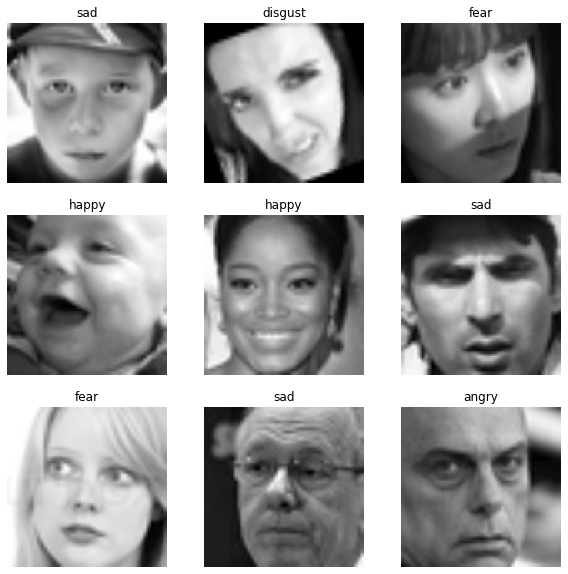

In [4]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8")[:,:,0], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [26]:
# Build the Model

model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,1)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),  
                  layers.Dense(128, activation = 'relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  mode='auto',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_3.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="auto",
                                                      save_freq="epoch",
                                                    )
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 28, 28, 128)      

In [27]:
epochs = 50
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = batch_size, 
                    verbose = 2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
955/955 - 88s - loss: 1.5024 - accuracy: 0.4141 - val_loss: 1.2452 - val_accuracy: 0.5168
Epoch 2/50
955/955 - 86s - loss: 1.2061 - accuracy: 0.5406 - val_loss: 1.0748 - val_accuracy: 0.5928
Epoch 3/50
955/955 - 85s - loss: 1.0579 - accuracy: 0.5994 - val_loss: 0.9835 - val_accuracy: 0.6323
Epoch 4/50
955/955 - 85s - loss: 0.9292 - accuracy: 0.6503 - val_loss: 0.9149 - val_accuracy: 0.6597
Epoch 5/50
955/955 - 86s - loss: 0.8180 - accuracy: 0.6955 - val_loss: 0.8792 - val_accuracy: 0.6867
Epoch 6/50
955/955 - 86s - loss: 0.7236 - accuracy: 0.7305 - val_loss: 0.8112 - val_accuracy: 0.7133
Epoch 7/50
955/955 - 85s - loss: 0.6337 - accuracy: 0.7664 - val_loss: 0.7549 - val_accuracy: 0.7379
Epoch 8/50
955/955 - 89s - loss: 0.5760 - accuracy: 0.7887 - val_loss: 0.7364 - val_accuracy: 0.7533
Epoch 9/50
955/955 - 85s - loss: 0.5171 - accuracy: 0.8109 - val_loss: 0.7079 - val_accuracy: 0.7679
Epoch 10/50
955/955 - 85s - loss: 0.4778 - accuracy: 0.8271 - val_loss: 0.6644 - val_accura

In [28]:
model_acc = model.evaluate(val_ds)[1]
model_acc

239/239 [==============================] - ETA: 5:42 - loss: 0.7843 - accuracy: 0.82 - ETA: 18s - loss: 0.6280 - accuracy: 0.8438 - ETA: 16s - loss: 0.6009 - accuracy: 0.849 - ETA: 12s - loss: 0.5086 - accuracy: 0.865 - ETA: 11s - loss: 0.4618 - accuracy: 0.870 - ETA: 10s - loss: 0.4893 - accuracy: 0.864 - ETA: 10s - loss: 0.4673 - accuracy: 0.869 - ETA: 10s - loss: 0.4660 - accuracy: 0.871 - ETA: 9s - loss: 0.4481 - accuracy: 0.873 - ETA: 9s - loss: 0.4689 - accuracy: 0.87 - ETA: 9s - loss: 0.4807 - accuracy: 0.87 - ETA: 9s - loss: 0.4756 - accuracy: 0.87 - ETA: 8s - loss: 0.4850 - accuracy: 0.87 - ETA: 8s - loss: 0.4752 - accuracy: 0.87 - ETA: 8s - loss: 0.4709 - accuracy: 0.87 - ETA: 8s - loss: 0.4532 - accuracy: 0.87 - ETA: 8s - loss: 0.4797 - accuracy: 0.87 - ETA: 8s - loss: 0.4964 - accuracy: 0.86 - ETA: 8s - loss: 0.5003 - accuracy: 0.86 - ETA: 8s - loss: 0.5093 - accuracy: 0.86 - ETA: 8s - loss: 0.5012 - accuracy: 0.86 - ETA: 7s - loss: 0.5073 - accuracy: 0.86 - ETA: 7s - loss:

0.8563387393951416

In [29]:
model.save("Emotions Model")

INFO:tensorflow:Assets written to: Emotions Model\assets


In [5]:
#Load the Model
file_path = "test.zip"
if not os.path.exists("Emotions Model/"):
    gdown.download("https://drive.google.com/uc?id=1easVnhBN9o1s60_eAyl8CGj_LHuPoXgc", file_path)
    gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)
model = keras.models.load_model('Emotions Model/')

'happy': 0.9999949, 'neutral': 0.9939804, 'surprise': 0.9972258
'happy': 0.9999949, 'surprise': 0.9972258, 'neutral': 0.9939804


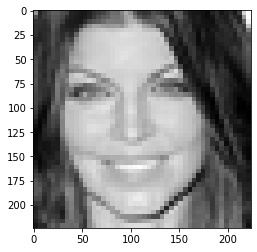

In [102]:
## Load and Predict an image

img = image.load_img("Emotions Test Set/240.png", target_size=(img_height,img_width), color_mode = "grayscale")
plt.imshow(img, cmap="gray")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)

res = {}

class_label = " "
index = list(np.where(np.where(classes > 0.8, 1, 0)[0] == 1)[0])

dictionary = dict()
sorted_dict = dict()
for i in index:
    dictionary[class_names[i]] = classes[0][i]
sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
print(str(dictionary)[1:-1])
print(str(sorted_dict)[1:-1])

In [ ]:
cap = cv2.VideoCapture(0)

if (cap.isOpened() == False): 
    print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
skip_frames = 30
cur_frames = 0

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
 
while(True):
    ret, frame = cap.read()
    
    if ret == True:
        process_frame = cur_frames % skip_frames == 0
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 5)
        if process_frame:
            resized = cv2.resize(gray[y:y+h, x:x+w], (img_height,img_width))
            x = image.img_to_array(resized)
            x = np.expand_dims(x, axis=0)
            images = np.vstack([x])
            classes = model.predict(images)
            dictionary = dict()
            sorted_dict = dict()
            index = list(np.where(np.where(classes > 0.8, 1, 0)[0] == 1)[0])
            for i in index:
                dictionary[class_names[i]] = classes[0][i]
            sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
            for w in sorted_keys:
                sorted_dict[w] = dictionary[w]
            print(str(sorted_dict)[1:-1])
            cv2.imshow('frame', frame)
            cur_frames += 1
        else:
            cv2.imshow('frame', frame)
            cur_frames += 1
        #out.write(frame)
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break 

cap.release()
#out.release()
 
# Closes all the frames
cv2.destroyAllWindows()